### **Chapter02. 신경망을 위한 수학 기초 (58~130p)**

#### **Chapter02.00 개념 정리**

* **신경망 파라미터를 결정하는 방법**
  * **지도학습**
    * 신경망의 가중치와 편향을 정하기 위해 미리 주어진 ***학습 데이터(훈련 데이터) 존재***
    * 학습 데이터에서 가중치와 편향을 결정하는 것을 ***학습***이라 함
  * **비지도학습**
* **신경망 학습 방법**
  * **모델의 최적화**
    * 신경망이 계산한 예측값과 정답 사이의 오차를 계산하고, 학습 데이터에서 나온 오차들의 합이 최소가 되도록 가중치와 편향을 결정
  * **오차 총합(비용함수) ➜ $C_T$**
    * 예측값과 정답 사이의 오차를 제곱(제곱 오차)하고, 학습 데이테 전체의 제곱오차를 합한 것

* **수학의 최소제곱법 / 통계의 회귀분석**
  * 제곱오차를 이용하여 파라미터를 결정하는 방법

#### **Chapter02.01 신경망의 필수 함수 (58p)**

* **1차 함수**
  * 신경망에서 노드가 받는 ***'가중입력'***은 1차 함수 관계로 표현
  * $y = ax + b (a,b 는 상수, a \neq 0)$
  * $a$는 기울기, $b$는 절편
  * 1차 함수는 ***독립변수가 여러 개***일 때도 있음
    * $y = ax_1 + bx_2 + c (a, b, c는 상수, a \neq 0, b \neq 0)$
  * **독립변수**
    * $x$가 주어지면 $y$가 결정되는 관계일 때,  $y$는 $x$의 함수
       * $y = f(x)$ ➜ $x = 독립변수$ $y = 종속변수$

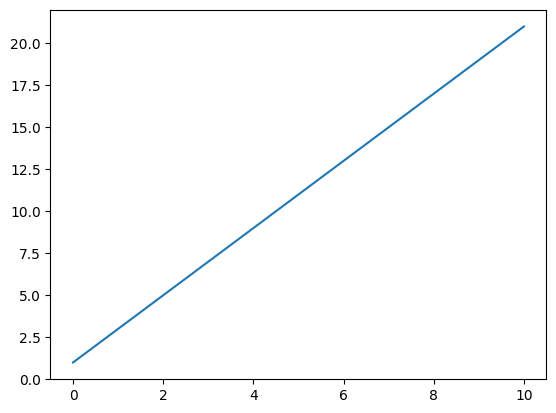

In [ ]:
# 1차 함수 그래프
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 11, 1)
y = (2 * x) + 1

plt.plot(x, y)
plt.show()

* **2차 함수**
  * $y = ax^2 + bx + c (a, b, c는 상수, a \neq 0)$
  * $a$가 양수라면 아래로 볼록한 그래프로 ***최솟값*** 존재

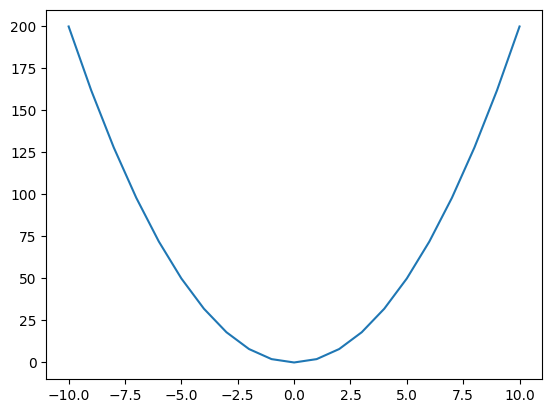

In [ ]:
# 2차 함수 그래프
x = np.arange(-10, 11, 1)
y = 2 * (x**2)

plt.plot(x, y)
plt.show()

* **계단 함수 (Step Function)**
  * $f(x) =\begin{cases}0 & ( x < 0)  \\1 & ( x \geq 0) \end{cases} $

  * 원점에서 불연속
  * 원점에서 ***미분 불가능*** 특징 때문에 신경망의 활성화 함수로 자주 사용 되지 않음
  * 응용수학에서는 선형 응답 함수

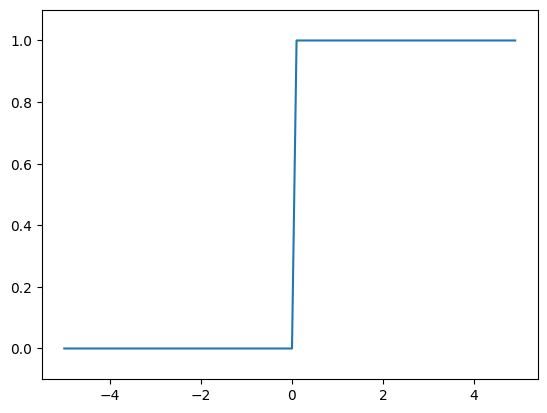

In [ ]:
# 계단 함수 그래프
def step_function(x):
  return np.array(x >= 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.ylim(-0.1, 1.1)
plt.plot(x, y)
plt.show()

* **지수함수**
  * **$y = a^x (a는 양의 상수, a \neq 1)$**
  * 상수 $a$는 지수함수의 ***밑(base)***
  * 밑의 값으로 중요한 것은 ***자연상수 $e$***
    * $e$ = 2.718281828.....

* **시그모이드 함수 (Sigmoid Function)**
  * **$\sigma(x) = \frac{1}{1+e^{-x}} = \frac{1}{1+exp(-x)}$**
  * 자연상수를 포함하는 지수함수를 분모로 갖는 함수
  * 신경망에서 자주 사용하는 활성화 함수
  * 어디서나 ***미분 가능***
  * 함숫값이 0과 1 사이라 ***함숫값으로 확률 계산 가능***

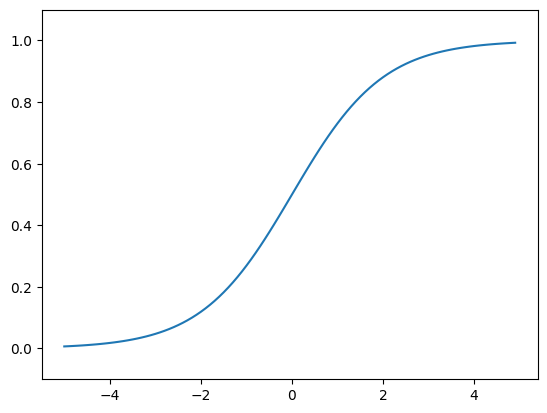

In [ ]:
# 시그모이드 함수 그래프
def sigmoid_function(x):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid_function(x)

plt.ylim(-0.1, 1.1)
plt.plot(x, y)
plt.show()

* **정규분포 (Normal Distribution)**
  * 신경망의 가중치 및 편향의 초깃값을 구할 때 도움
  * 이 분포를 따르는 ***정규분포 난수를 초깃값으로 사용***하면 신경망 계산 시 좋은 결과 얻을 수 있음
  * 정규분포란 ***확률밀도함수를 따르는 확률분포***를 말함
  * 자연환경에서 나타나는 데이터의 분포를 설명하는데 사용
  * 특징
    * 종모양의 형태를 가지며 ***좌우 대칭***인 모양
    * 처음부터 끝까지의 ***넓이값은 항상 1***
  * 표기법
    * $N(\mu, \sigma ^ 2)$
  * 예) 평균이 100, 표준편차가 10인 group의 정규분포는 $N(100, 10 ^ 2)$를 따름


* **확률밀도함수 (PDF : Probability Density Function)**
  * **$f(x) = \frac{1}{\sqrt{2\pi\sigma}} \cdot e^{-\frac{(x - \mu)^2}{2\sigma^2}}$**
    * $\mu = 기댓값(평균값)$
    * $\sigma = 표준편차$


* **표준정규분포 (Standard Normal Distribution)**
  * 기존 정규분포를 표준정규분포로 바꾸는 과정을 표준화라고 함
  * 확률밀도함수 공식이 너무 복잡하여 ***표준정규분포로 표준화(Standardization) 진행***해서 문제 해결
    * $Z = \frac{X - \mu}{\sigma}$
      * $Z$ = 표준화된 값 ($Z-Score$)
      * $X$ = 원시 데이터 값
      * $\mu$ = 원시 데이터의 평균
      * $\sigma$ = 원시 데이터의 표준편차

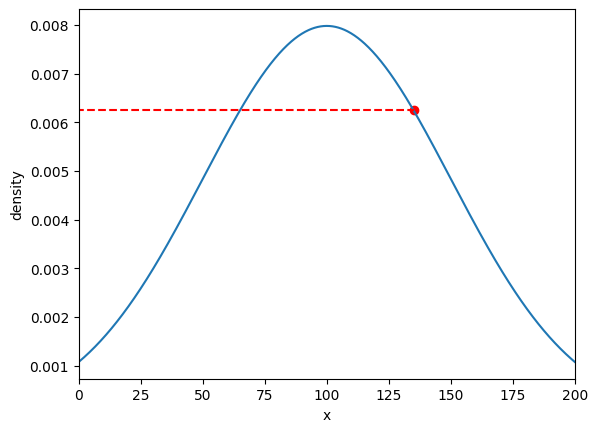

In [ ]:
## 확률밀도함수 그래프
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

# 평균 = 100, 표준편차 = 50인 정규분포 객체 정의
norm_dist = scipy.stats.norm(loc = 100, scale = 50)

x = np.linspace(0, 200, 1000)
density = norm_dist.pdf(x)
plt.plot(x, density)

# x = 135인점 표시
plt.scatter(135, norm_dist.pdf(135), c = 'r')
plt.plot([-10, 135], [norm_dist.pdf(135), norm_dist.pdf(135)], 'r--')

plt.xlabel('x')
plt.ylabel('density')
plt.xlim(0, 200)

plt.show()

#### **Chapter02.02 신경망의 이해를 돕는 수열과 점화식 (67p)**

* **수열**
  * 숫자의 열
  * 정렬하는 숫자 하나하나를 ***항***이라 함
  * **유한수열**
    * 유한개 항 수를 갖는 수열
    * 유한수열의 마지막 항은 ***말항 (final term, 끝항)***이라 함
    * 신경망은 유한수열
  * 예) 수열 1, 3, 5, 7, 9
    * 유한수열
    * 첫 번쨰 항 = 1
    * 말항 = 9
    * 항 수 = 5

* **수열의 일반항**
  * 주어진 수열의 $n$번쨰 수를 $n$을 이용한 식으로 나타낸 것
  * 수열의 $n$번째 수 ➜ $a_n$
  * 수열 전체 ➜ {$a_n$}
  * 예) 짝수열의 일반항 ➜ $a_n = 2n$
  * 예) 홀수열의 일반항 ➜ $b_n = 2n-1$
  * $l층$의 $j$번째 노드의 출력값 ➜ $a_j^l$
  * 신경망에서 가중 입력과 출력은 수열로 간주

* **수열과 점화식**
  * 1항 $a_1$과 인접한 2개의 항 $a_n, a_{n+1}$으로 수열 {$a_n$}을 표현한 관계식을 점화식이라 함
  * 예) 1항이 $a_1 = 1$이고, 관계식이 $a_{n+1} = a_n + 2$로 주어졌을 때 수열 표현
    * $a_1 = 1, a_2 = a_{1+1} = a_1 + 2 = 1 + 2 = 3, a_3 = a_{2+1} = a_2 + 2 = 3 + 2 = 5, \cdots$

* **수열의 귀납적 정의**
    * 이웃에 있는 항의 관계로 표현
    * 예) 짝수열 {$a_n$} 수열의 귀납적 정의
      * 1항 ➜ $a_1 = 2$
      * 점화식 ➜ $a_{n+1} = a_n + 2$

* **연립 점화식**
   * 여러 수열이 몇 가지 관계식으로 연결된 것
   * 신경망에서는 모든 노드의 입력과 출력이 연립 점화식으로 연결
   * $\begin{cases}a_{n+1} = a_n + 2b_n + 2\\b_{n+1} = 2a_n + 3b_n + 1\\ \end{cases}$

#### **Chapter02.03 신경망에서 많이 사용하는 시그마 기호 (72p)**

* **시그마 기호의 의미**
  * 수열의 합을 간결하게 표현하는 것
  * 예) 수열 $a_n$의 합 ➜ 1항부터 $n$ 항까지 수열 $a_n$의 합계
    * $\displaystyle\sum_{k=1}^{n} a_k = a_1 + a_2 + a_3 + \cdots  + a_{n-1} + a_n$

* **시그마 기호의 특징**
  * ***선형성 특징***
    * 연산의 분해, 결합, 확장 가능
  * $\displaystyle\sum_{k=1}^{n} (a_k + b_k)$ = $\displaystyle\sum_{k=1}^{n} a_k + \displaystyle\sum_{k=1}^{n} b_k $
  * $\displaystyle\sum_{k=1}^{n} ca_k $ = $c \displaystyle\sum_{k=1}^{n} a_k$ ($c$는 상수)

#### **Chapter02.04 신경망의 이해를 돕는 벡터 (75p)**

* **유향선분과 벡터**
  * 두 점 $A, B$가 있을 때 $A$에서 $B$로 향하는 방향을 갖는 선분 $AB$를 유향선분이라 함 ($A$ 시작점, $B$ 종점)
  * 유향선분 속성
    * 점 $A$의 위치
    * $B$에 관한 방향
    * $AB$의 길이

* **벡터 (Vector)**
  * ***크기 (스칼라)와 방향***을 갖는 양이며 화살표선으로 표현
  * $\vec{AB}$

* **벡터의 성분 표시**
  * 벡터의 화살표선을 좌표 평면애 배치하여 표현
  * 시작점을 원점으로 했을 때 종점의 좌표가 성분 표시
  * $\vec{a} = (a_1, a_2)$

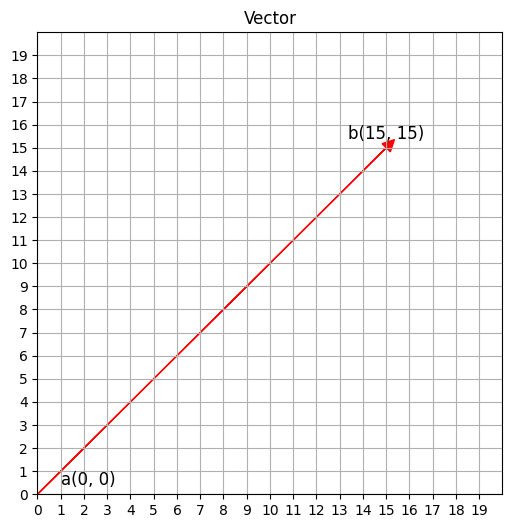

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = [0,0]
b = [15,15]

plt.figure(figsize=(6,6))
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xticks(ticks=np.arange(0, 20, step=1))
plt.yticks(ticks=np.arange(0, 20, step=1))

plt.arrow(a[0], a[1], b[0], b[1], head_width = .5, head_length = .5, color = 'red')
plt.text(a[0] + 1, a[1] + 1, "a(0, 0)", fontsize = 12, ha = "left", va = "top")
plt.text(b[0], b[1] + 1, "b(15, 15)", fontsize = 12, ha = "center", va = "top")

plt.title("Vector")
plt.grid()
plt.show()

* **벡터의 크기**
  * 벡터를 나타내는 ***화살표선의 길이***
  * 벡터 $\vec a$ 크기 표현 ➜ $\vert \vec a \vert$
  * 예) $\vec a = (3, 4)$의 길이
    * $\vert \vec a \vert = \sqrt{3^2 + 4^2} = 5$

In [ ]:
a = np.array([3, 4])
np.linalg.norm(a)

5.0

* **벡터의 내적**
  * ***크기 (스칼라)만 고려***한 벡터의 곱셈
  * 신경망의 입력과 출력은 모두 벡터 형태이며, ***입력과 가중치의 내적을 출력***으로 내보냄
  * 내적은 "***두 벡터가 어느 정도로 같은 방향을 향하고 있는가***"를 나타냄 ➜ 벡터의 내적값이 크면 방향이 비슷함
  * $\vec a \cdot \vec b = \vert \vec a \vert \vert \vec b \vert cos\theta$

* **코시-슈바르츠 부등식 (CBS 부등식)**
  * 임의의 $cos\theta$ ➜ $-1 \leq cos \theta \leq 1$ 범위를 가짐
  * $-\vert \vec a \vert \vert \vec b \vert \leq \vert \vec a \vert \vert \vec b \vert cos\theta \leq \vert \vec a \vert \vert \vec b \vert$ ➜ $-\vert \vec a \vert \vert \vec b \vert \leq \vec a \cdot \vec b \leq \vert \vec a \vert \vert \vec b$
  * 두 개의 벡터의 크기를 일정하게 할 때 관계의 특징
    * $\theta = 180^\circ (cos\theta = -1)$ ➜ 두 벡터가 반대 방향이라면 내적은 최솟값
    * $0^\circ < \theta < 180^\circ (-1 < cos\theta < 1)$ ➜ 두 벡터가 평행하지 않다면 내적은 반대 방향일 때와 평행일 때 사이의 중간값
    * $\theta = 0^\circ (cos\theta = 1)$ ➜ 두 벡터가 같은 방향이라면 내적은 최댓값
  * 이 특징은 ***경사하강법의 기본 원리***

* **내적의 성분 표시**
  * $\vec a \cdot \vec b =a_1b_1 + a_2b_2 $
  * 예) $\vec a = (2, 3)$이고 $\vec b = (5, 1)$이라면 내적은
    * $\vec a \cdot \vec b = (2 \cdot 5) + (3 \cdot 1) = 10 + 3 = 13$

* **벡터의 일반화**
  * 벡터는 평면과 입체 공간의 특징을 ***임의의 차원에 그래로 확장 가능***

* **법선 벡터 (Normal Vector)**
  * 평면과 수직인 벡터
  * 법선 벡터에 따라서 ***변형력의 방향과 크기가 달라짐***

#### **Chapter02.05 신경망의 이해를 돕는 행렬 (85p)**

* **행렬 (Matrix)**
  * 수와 식을 사각 형태의 배열로 나열한 것
  * 행과 열 수가 같은 행렬은 ***정사각행렬*** ➜ $X = \begin{bmatrix}1&2\\3&4\\ \end{bmatrix}$
  * **열벡터** ➜ $X = \begin{bmatrix}3\\1\\4\end{bmatrix}$
  * **행벡터** ➜ $Y = \begin{bmatrix}1&2&3\\\end{bmatrix}$
  * $m$행 $n$열 행렬
   * $A_{m,n} =
 \begin{bmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{bmatrix}$

#### **Chapter02.06 신경망을 위한 미분의 기본 (90p)**

#### **Chapter02.07 신경망을 위한 편미분의 기본 (97p)**

#### **Chapter02.08 연쇄법칙 (101p)**